# Task 1: Hotel Booking Data Exploratory Analysis

**Objective:**

Perform an exploratory data analysis on the provided "Hotel Bookings.csv" dataset to uncover trends and provide actionable insights.
Task:
> Conduct data cleaning, analysis, and visualization using Python.

> Identify key trends and suggest strategies to improve booking rates.
Requirements:

> Use Python libraries such as Pandas for data manipulation and Matplotlib or Seaborn for visualization.

> Document your analysis process and conclusions in a Jupyter Notebook.
Submission:
Submit a Jupyter Notebook (.ipynb) with your analysis and insights.

In [ ]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For statistical data visualization

# Setting up the style for seaborn plots
sns.set_style("whitegrid")


# Load and Inspect the Dataset

Before analyzing, we need to understand the dataset's structure, size, and data types.



In [ ]:
# Define file path
file_path = "/content/Hotel Bookings.csv"


# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Check for Missing Values

Missing values can distort analysis. We need to identify and handle them properly.



In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Show only columns with missing values
print(missing_values)


children         4
country        488
agent        16340
company     112593
dtype: int64


# Handle Missing Values
Strategy for Handling Missing Values
Column	  
children
country
agent
company

In [ ]:
# Drop rows where 'children' is missing
df.dropna(subset=['children'], inplace=True)

# Fill missing values
df['country'].fillna("Unknown", inplace=True)  # Replace missing country with "Unknown"
df['agent'].fillna(0, inplace=True)  # Replace missing agents with 0 (direct booking)
df['company'].fillna(0, inplace=True)  # Replace missing company with 0 (not booked via a company)

# Verify if missing values remain
print("Total missing values after handling:", df.isnull().sum().sum())  # Should return 0


Total missing values after handling: 0


<ipython-input-8-04194736d040>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna("Unknown", inplace=True)  # Replace missing country with "Unknown"
<ipython-input-8-04194736d040>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

# Check for Duplicates

Duplicate records can bias analysis and inflate statistics.



In [ ]:
# Check duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicates
df.drop_duplicates(inplace=True)

# Verify duplicates are removed
print(f"Remaining duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 31994
Remaining duplicate rows: 0


# Analyze Booking Cancellations

High cancellations impact hotel revenue and planning.

<ipython-input-10-42faa98c8fe3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="is_canceled", data=df, palette="coolwarm")


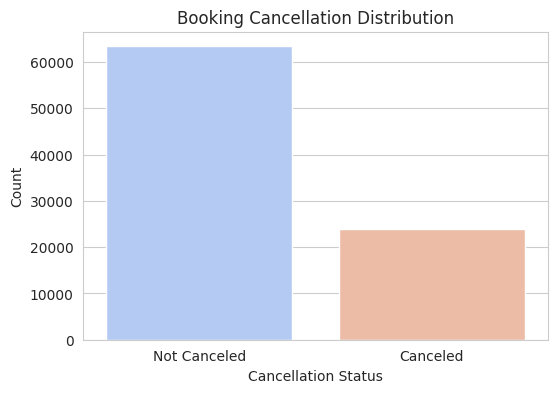

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of cancellations vs non-cancellations
plt.figure(figsize=(6, 4))
sns.countplot(x="is_canceled", data=df, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Not Canceled", "Canceled"])
plt.title("Booking Cancellation Distribution")
plt.xlabel("Cancellation Status")
plt.ylabel("Count")
plt.show()


A high number of cancellations might indicate poor customer commitment.

Hotels may need to impose stricter cancellation policies.



# Lead Time Analysis

Lead time helps hotels manage pricing and inventory.

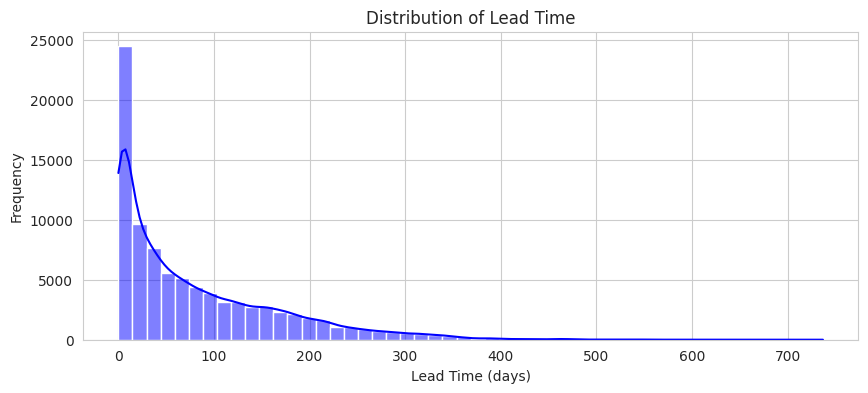

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(df["lead_time"], bins=50, kde=True, color="blue")
plt.title("Distribution of Lead Time")
plt.xlabel("Lead Time (days)")
plt.ylabel("Frequency")
plt.show()


Long lead times indicate advance bookings.

Short lead times suggest last-minute bookings.

 # Seasonal Trends

Seasonality affects hotel demand and pricing.

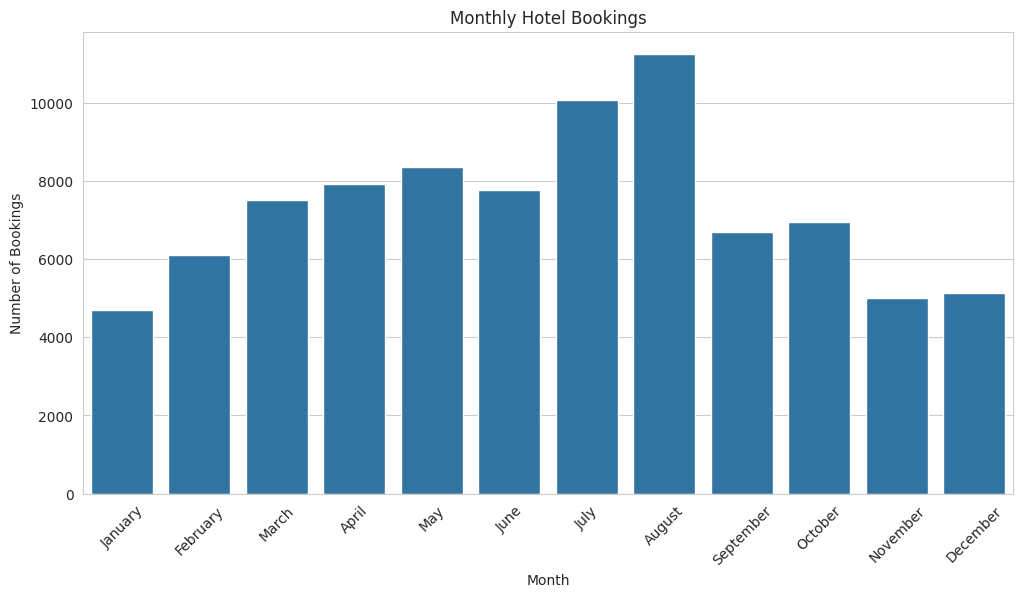

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="arrival_date_month", data=df,
              order=["January", "February", "March", "April", "May", "June",
                     "July", "August", "September", "October", "November", "December"])
plt.xticks(rotation=45)
plt.title("Monthly Hotel Bookings")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.show()



Summer months (June–August) likely see peak demand.

Hotels should adjust pricing during off-season months.

# Special Requests vs Cancellations

Guests making special requests might be more committed.

<ipython-input-13-e4e8ccd5aa97>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_canceled", y="total_of_special_requests", data=df, palette="coolwarm")


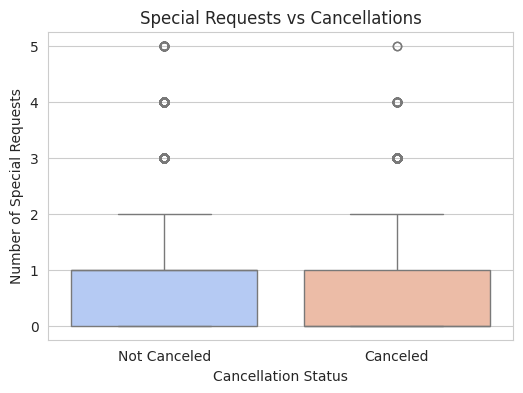

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="is_canceled", y="total_of_special_requests", data=df, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Not Canceled", "Canceled"])
plt.title("Special Requests vs Cancellations")
plt.xlabel("Cancellation Status")
plt.ylabel("Number of Special Requests")
plt.show()


**Insights**:
More special requests may correlate with fewer cancellations.

Encouraging special requests might improve customer retention.

# Price (ADR) vs Cancellations

Higher prices may lead to more cancellations.

<ipython-input-14-72d9ceb2039c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_canceled", y="adr", data=df, palette="coolwarm")


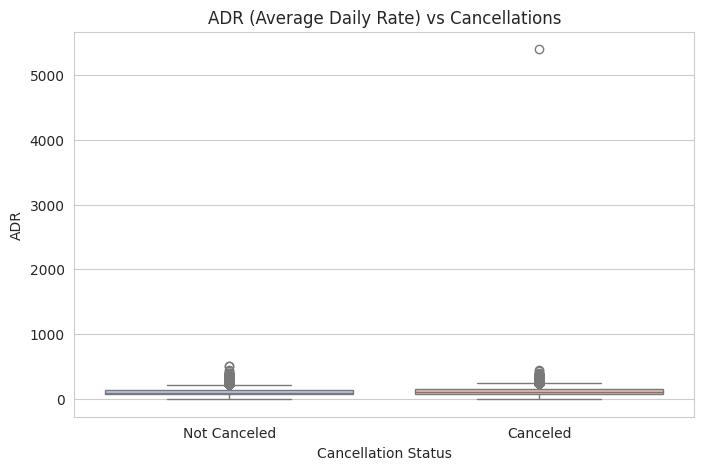

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="is_canceled", y="adr", data=df, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Not Canceled", "Canceled"])
plt.title("ADR (Average Daily Rate) vs Cancellations")
plt.xlabel("Cancellation Status")
plt.ylabel("ADR")
plt.show()


**Insights:**
High ADR bookings show more cancellations.

Hotels might benefit from flexible pricing for premium bookings.